## Black Scholes Tests

In [1]:
import BSModel as BS
S0 = 100
K = 100
r = 0.01
sigma = 0.1
T = 3
c_bs = BS.Price(S0,K,r,sigma,T)
print(c_bs)
print(BS.IVol(c_bs,S0,K,r,T))

8.378468512110388
[0.1]


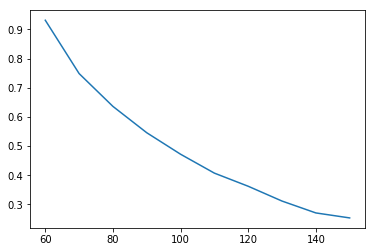

In [2]:
vectK=(60,70,80,90,100,110,120,130,140,150)
vectP=(68.77,58.14,49.21,40.71,32.77,25.25,19.19,13.11,8.33,5.71)

BS.IVolTCurve(vectP,vectK,S0,r,T)

(array([2.36562577e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.09687731e-06,
        3.07531350e-05, 2.03443816e-04, 6.17428326e-04, 1.46195673e-03,
        3.23617605e-03, 5.83599878e-03, 9.52874060e-03, 1.36804138e-02,
        1.76475682e-02, 2.03207254e-02, 2.24355948e-02, 2.28803325e-02,
        2.24663479e-02, 1.99587846e-02, 1.72596056e-02, 1.44918235e-02,
        1.17926445e-02, 9.28508115e-03, 6.67106467e-03, 5.06480478e-03,
        3.73768872e-03, 2.61401648e-03, 1.68195992e-03, 1.28926605e-03,
        8.42162774e-04, 5.51190805e-04, 3.45381363e-04, 2.20003197e-04,
        1.34840669e-04, 1.08818785e-04, 7.57000247e-05, 3.07531350e-05,
        2.36562577e-05, 9.46250308e-06, 9.46250308e-06, 0.00000000e+00,
        4.73125154e-06, 4.73125154e-06]),
 array([  0.        ,   4.2272113 ,   8.45442261,  12.68163391,
         16.90884522,  21.1360

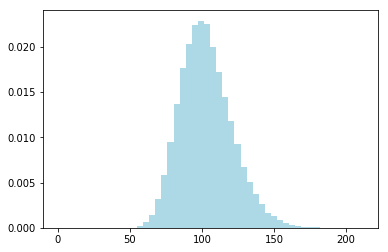

In [3]:
n = 100000
data = BS.np.zeros(n)
for i in range(1,n):
    data[i-1] = BS.Simulate(S0,r,sigma,T)

BS.pplot.hist(data, bins=50, density=True,color="lightblue")

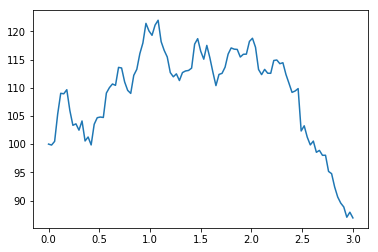

In [4]:
m = 100
t = [x * T/m for x in range(0, m+1, 1)]
S = BS.SimulatePath(m,S0,r,sigma,T)
BS.pplot.plot(t,S)
BS.pplot.show()

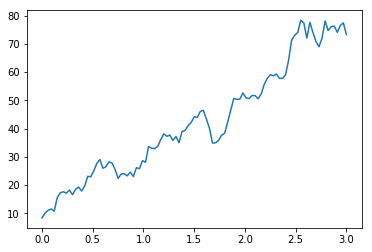

In [5]:
import BacktestModel as Backtest
vectP = Backtest.PricePath(m,T,S0,K,BS.FuncSimulatePath,BS.FuncPrice,ModelParams=(r,sigma))
vectTime = [x * T/m for x in range(0, m+1, 1)]
BS.pplot.plot(vectTime,vectP)
BS.pplot.show()

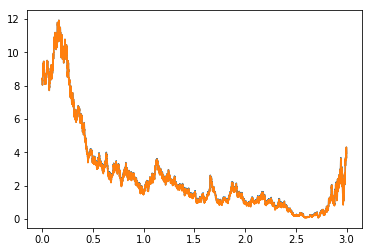

In [10]:
Backtest.DeltaHedgeMod(10000,T,S0,K,BS.FuncSimulatePath,BS.FuncPrice,BS.FuncDelta,BS.FuncReturnZC,ModelParams=(r,sigma))

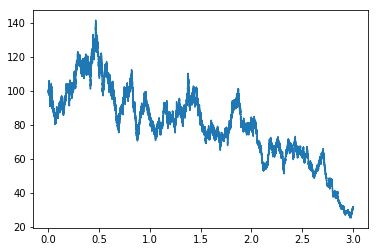

In [29]:
import HestonModel as Heston
m=100000
v0 = 0.32
kappa = 0.5
theta = 0.3
xi = 0.05
rho = -0.5
t = [x * T/m for x in range(0, m+1, 1)]
S = Heston.SimulatePath(m,S0,r,v0,kappa,theta,xi,rho,T)
BS.pplot.plot(t,S)
BS.pplot.show()

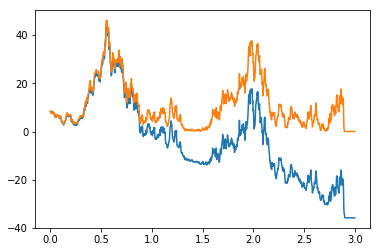

In [12]:
Backtest.DeltaHedgeMis(1000,T,S0,K,Heston.FuncSimulatePath,BS.FuncPrice,BS.FuncDelta,BS.FuncReturnZC,ModelSimuParams=(r,r,v0,kappa,theta,xi,rho),ModelPriceParams=(r,sigma))

In [20]:
import cmath as cpx
import math as m
def Heston_CharacteristicFunctionLogPrice(t,omega,S0,v0,r,kappa,theta,ksi,rho):
    alpha = complex(-omega**2 / 2, -omega / 2)
    beta = complex(kappa,-rho*ksi*omega)
    gamma = ksi**2 / 2
    h = (beta**2-4*alpha*gamma)**0.5
    r_m = (beta-h) / ksi**2
    r_p = (beta+h) / ksi**2
    g = r_m / r_p
    C = kappa*(r_m*t-2*cpx.log((1-g*cpx.exp(-h*t))/(1-g))/ksi**2)
    D = r_m*((1-cpx.exp(-h*t))/(1-g*cpx.exp(-h*t)))
    return cpx.exp(complex(C*theta+D*v0,omega*log(S0*exp(r*t))))
t = 1
omega = 1
S0 = 100
v0 = 0.1
r = 0.02
kappa = 1
theta = 0.2
ksi = 0.3
rho = -0.6
print(Heston_CharacteristicFunctionLogPrice(t,omega,S0,v0,r,kappa,theta,ksi,rho))

NameError: name 'log' is not defined

In [37]:
from scipy.integrate import *
from numpy import *
def RPI1_HestonChFuncLnS(omega,K,t,S0,v0,r,kappa,theta,ksi,rho):
    num = Heston_CharacteristicFunctionLogPrice(t,omega-complex(0,1),S0,v0,r,kappa,theta,ksi,rho)*cpx.exp(complex(0,-omega*log(K)))
    denom = complex(0,omega*Heston_CharacteristicFunctionLogPrice(t,-complex(0,1),S0,v0,r,kappa,theta,ksi,rho))
    return (num / denom).real
def RPI2_HestonChFuncLnS(omega,K,t,S0,v0,r,kappa,theta,ksi,rho):
    num = Heston_CharacteristicFunctionLogPrice(t,omega,S0,v0,r,kappa,theta,ksi,rho)*cpx.exp(complex(0,-omega*log(K)))
    denom = complex(0,omega)
    return (num / denom).real
def Heston_CallPrice(K,S0,r,T,v0,kappa,theta,ksi,rho):
    Pi_1 = 1/2+1/math.pi*quad(RPI1_HestonChFuncLnS,0,inf,args=(K,T,S0,v0,r,kappa,theta,ksi,rho))[0]
    Pi_2 = 1/2+1/math.pi*quad(RPI2_HestonChFuncLnS,0,inf,args=(K,T,S0,v0,r,kappa,theta,ksi,rho))[0]
    return S0*Pi_1-K*exp(-r*T)*Pi_2
T = 1
S0 = 100
v0 = 0.1
r = 0.02
kappa = 1
theta = 0.2
ksi = 0.3
rho = -0.6
K = 100
Price = Heston_CallPrice(K,S0,r,T,v0,kappa,theta,ksi,rho)
print(Price)

15.199287900630452


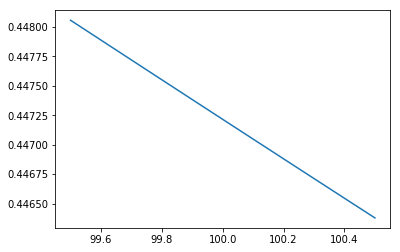

[0.44719805]
[0.44721482]


In [55]:
T = 0.0001
S0 = 100
v0 = 0.2
r = 0.05
kappa = 1.5
theta = 0.25
ksi = 0.5
rho = -0.6
MktCStrikes=(99.5,99.6,99.7,99.8,99.9,100,100.1,100.2,100.3,100.4,100.5)
HestonImpliedVols=np.zeros(len(MktCStrikes))
i=0
for K in MktCStrikes:
    HestonPrice = Heston_CallPrice(K,S0,r,T,v0,kappa,theta,ksi,rho)
    HestonImpliedVols[i] = ImpliedVolatility_bis(HestonPrice,'C',S0,K,r,T)
    i = i+1
pplot.plot(MktCStrikes,HestonImpliedVols)
pplot.show()
SkewImpliedVolatility(HestonPrice,'C',S0,100,r,T)
res=ImpliedVolatility_bis(Heston_CallPrice(100.01,S0,r,T,v0,kappa,theta,ksi,rho),'C',S0,100.01,r,T)
print(res)
res=ImpliedVolatility_bis(Heston_CallPrice(100,S0,r,T,v0,kappa,theta,ksi,rho),'C',S0,100,r,T)
print(res)

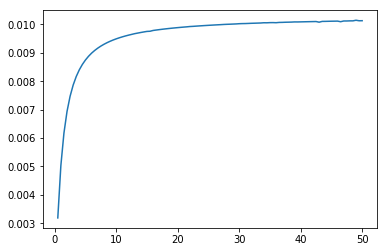

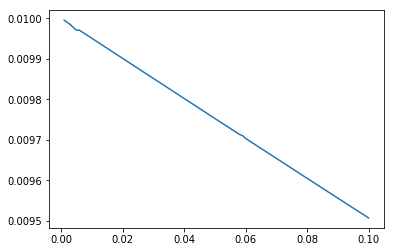

In [75]:
def HestonSkewImpliedVolatility(MarketType,Spot,Strike,Rate,Maturity,v0,kappa,theta,ksi,rho,vol_start=0.1,eps=0.005):
    MarketPrice_plus = Heston_CallPrice(Strike+eps,S0,r,T,v0,kappa,theta,ksi,rho)
    MarketPrice_minus = Heston_CallPrice(Strike-eps,S0,r,T,v0,kappa,theta,ksi,rho)
    vplus = ImpliedVolatility_bis(MarketPrice_plus,MarketType,Spot,Strike+eps,Rate,Maturity,vol_start)
    vminus = ImpliedVolatility_bis(MarketPrice_minus,MarketType,Spot,Strike-eps,Rate,Maturity,vol_start)
    return (vplus-vminus)/(2*eps)
def HestonSkewImpliedVolatilitySquared(MarketType,Spot,Strike,Rate,Maturity,v0,kappa,theta,ksi,rho,vol_start=0.1,eps=0.005):
    MarketPrice_plus = Heston_CallPrice(Strike+eps,S0,r,T,v0,kappa,theta,ksi,rho)
    MarketPrice_minus = Heston_CallPrice(Strike-eps,S0,r,T,v0,kappa,theta,ksi,rho)
    vplus = ImpliedVolatility_bis(MarketPrice_plus,MarketType,Spot,Strike+eps,Rate,Maturity,vol_start)**2
    vminus = ImpliedVolatility_bis(MarketPrice_minus,MarketType,Spot,Strike-eps,Rate,Maturity,vol_start)**2
    return (vplus-vminus)/(2*eps)
SmallMaturities=np.zeros(100)
LargeMaturities=np.zeros(100)
i=0
while i < 100:
    SmallMaturities[i]=(i+1)/1000
    LargeMaturities[i]=(i+1)/2
    i+=1
LargeHestonSkews=np.zeros(len(SmallMaturities))
SmallHestonSkews=np.zeros(len(LargeMaturities))
K=100
i=0
for T in LargeMaturities:
    LargeHestonSkews[i] = HestonSkewImpliedVolatilitySquared('C',S0,K,r,T,v0,kappa,theta,ksi,rho)/(rho*ksi / ((kappa-rho*ksi/2)*T))
    i = i+1
i=0
for T in SmallMaturities:
    SmallHestonSkews[i] = HestonSkewImpliedVolatilitySquared('C',S0,K,r,T,v0,kappa,theta,ksi,rho)/(rho*ksi/2)
    i = i+1    
pplot.plot(LargeMaturities,LargeHestonSkews)
pplot.show()
pplot.plot(SmallMaturities,SmallHestonSkews)
pplot.show()